Momentos de Variables Aleatorias
[Worked Example](https://drive.google.com/file/d/10thCA_6RKHJecB8o-jVRIZQ9lo2hvkc9/view)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 400 # Número de pacientes
presion = np.round(np.random.normal(loc=120, scale=2.5, size=N), decimals=1) # Distribución normal -> Gaussiana

paciente = np.arange(N) + 1 # Identificación de cada paciente

data = pd.DataFrame({'Presión':presion, 'Paciente':paciente}) # Datos en un DataFrame de Pandas
#data.to_clipboard()  # Con este comando se dejan los datos en el clipboard y pueden ser pegados en otra app

Text(0.5, 1.0, 'Histograma Pandas')

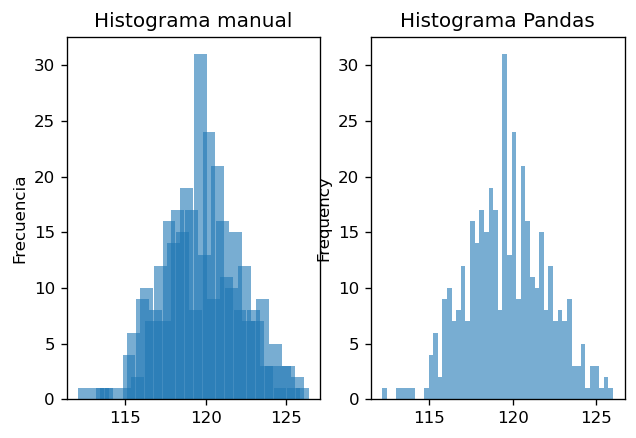

In [3]:
plt.figure(dpi=120)
plt.subplot(121)
#### Histograma manaual ####
bandas = 50
deltaB = (presion.max() - presion.min())/np.float(bandas)

x  = []
ys = np.zeros(bandas)

x0 = presion.min()
for k in range(bandas):
    xk = presion.min() + (k+1)*deltaB
    ys[k] = np.sum((presion >= x0) & (presion < xk))
    x.append(xk)
    x0 = xk
ys[-1] += np.sum(presion == presion.max())

plt.bar(x, ys, alpha=0.6)
plt.ylabel('Frecuencia')
plt.title('Histograma manual')
#############################

plt.subplot(122)
ax = plt.gca()
#### Histograma con Pandas ####
data['Presión'].plot.hist(bins=bandas, alpha=0.6, ax = ax)
plt.title('Histograma Pandas')
###############################

In [4]:
### Calculo de media ###
p = ys / np.float(N)  # Probabilidad para cada banda
media_calculo = np.sum(x*p)
media_numpy   = presion.mean()

In [5]:
varianza_calculo = np.sum((x - media_calculo)**2 * p)
varianza_numpy   = presion.var()

In [6]:
std_calculo = np.sqrt(varianza_calculo)
std_numpy   = presion.std()

In [7]:
print('Media por cálculo:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (media_calculo, media_numpy))
print('Desviación estándar:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (std_calculo, std_numpy))
print('Varianza por cálculo:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (varianza_calculo, varianza_numpy))

Media por cálculo:	119.8 [mm Hg],	numpy: 119.6 [mm Hg]
Desviación estándar:	2.4 [mm Hg],	numpy: 2.4 [mm Hg]
Varianza por cálculo:	5.9 [mm Hg],	numpy: 5.8 [mm Hg]
